# pytorch에서 제공하는 fashion minst 데이터셋과 CNN 을 이용한 분류 모델을 훈련하는 실습입니다.

p.179 5.2 합성곱 신경망 맛보기 참고

## 1. 자신의 컴퓨터에 설치된 torch, torchvision의 버전을 확인하고, GPU 지원 여부를 확인합니다.


In [31]:
import torch
torch.__version__

'2.2.2'

In [32]:
import torchvision
torchvision.__version__

'0.17.2'

In [33]:
import torch
torch.cuda.is_available()

True

## 2. 자신의 컴퓨터에 설치된 python 버전 및 라이브러리 설치 경로를 확인해 보세요.

In [34]:
import sys
sys.path, sys.version

(['c:\\Users\\user\\anaconda3\\envs\\py3_11\\python312.zip',
  'c:\\Users\\user\\anaconda3\\envs\\py3_11\\DLLs',
  'c:\\Users\\user\\anaconda3\\envs\\py3_11\\Lib',
  'c:\\Users\\user\\anaconda3\\envs\\py3_11',
  '',
  'c:\\Users\\user\\anaconda3\\envs\\py3_11\\Lib\\site-packages',
  'c:\\Users\\user\\anaconda3\\envs\\py3_11\\Lib\\site-packages\\win32',
  'c:\\Users\\user\\anaconda3\\envs\\py3_11\\Lib\\site-packages\\win32\\lib',
  'c:\\Users\\user\\anaconda3\\envs\\py3_11\\Lib\\site-packages\\Pythonwin',
  'c:\\Users\\user\\anaconda3\\envs\\py3_11\\Lib\\site-packages\\setuptools\\_vendor'],
 '3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]')

## 3. torchvision에서 제공하는 fashion mnist dataset (torchvision.datasets.FashionMNIST) 를 다운로드 받으세요. 이때, train (6만장), test(1만장) 을 각각 다운로드 받아 dataset_train 과 dataset_test 변수에 각각 저장하세요.

In [35]:
import numpy

In [36]:
!pip show torchvision

Name: torchvision
Version: 0.17.2
Summary: image and video datasets and models for torch deep learning
Home-page: https://github.com/pytorch/vision
Author: PyTorch Core Team
Author-email: soumith@pytorch.org
License: BSD
Location: C:\Users\user\anaconda3\envs\py3_11\Lib\site-packages
Requires: numpy, pillow, torch
Required-by: 


In [37]:
### 라이브러리 호출
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms # 데이터 전처리에 사용하는 라이브러리
from torch.utils.data import Dataset, DataLoader


In [38]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [39]:
train_dataset = torchvision.datasets.FashionMNIST("../chap05/data/", download=True, # 내려받을 위치 지정, 해당 파라미터의 위치에 해당 데이터셋이 있는지 확인한 후 내려받음
                                                  transform=transforms.Compose([transforms.ToTensor()])) # 이미지를 텐서(0~1)로 변경

test_dataset = torchvision.datasets.FashionMNIST("../chap05/data/", download=True, 
                                                 train=False, transform=transforms.Compose([transforms.ToTensor()]))

In [40]:
train_loader = torch.utils.data.DataLoader(train_dataset,
                                          batch_size=100)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=100)

In [41]:
train_dataset.data.shape # 60000개 저장

torch.Size([60000, 28, 28])

In [42]:
test_dataset.data.shape # 10000개 저장

torch.Size([10000, 28, 28])

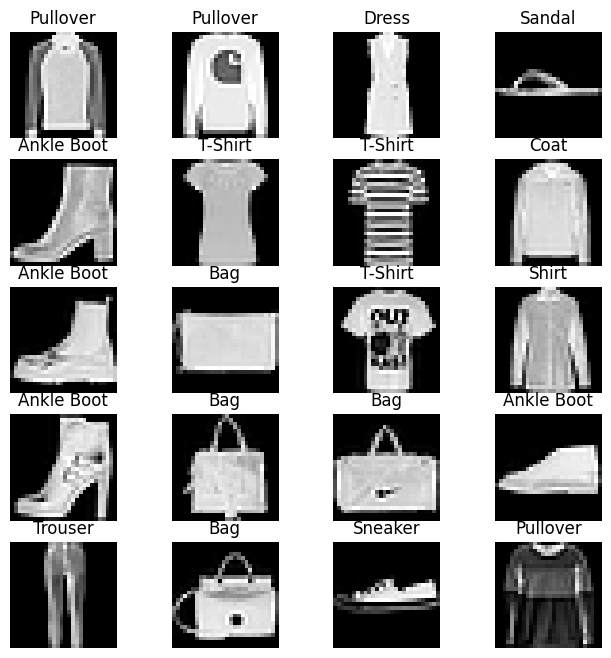

In [43]:
labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 
              5 : 'Sandal', 6 : 'Shirt', 7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'}

fig = plt.figure(figsize=(8,8));
columns = 4;
rows = 5;
for i in range(1, columns * rows + 1) :
  img_xy = np.random.randint(len(train_dataset))
  img = train_dataset[img_xy][0][0,:,:]
  fig.add_subplot(rows, columns, i)
  plt.title(labels_map[train_dataset[img_xy][1]])
  plt.axis('off')
  plt.imshow(img, cmap='gray')
plt.show() # 20개의 이미지 데이터를 시각적으로 표현


In [44]:
from torchvision.datasets import FashionMNIST

In [45]:
dataset_train = FashionMNIST('.',download=True)
dir(dataset_train)
type(dataset_train.data), dataset_train.data.shape

(torch.Tensor, torch.Size([60000, 28, 28]))

In [46]:
dataset_test = FashionMNIST('.', download=False, train=False)
dataset_test.data.shape

torch.Size([10000, 28, 28])

## 4. torch.rand 를 이용하여 (32, 1, 28, 28) 크기의 데이터를 생성해 input 변수에 저장하세요.

In [47]:
input = torch.rand((32, 1, 28, 28)) # 1은 컬러 옵션 # 중요하다!
input.shape

torch.Size([32, 1, 28, 28])

## 5. torch.nn.Conv2d 를 이용하여 (32, 8, 28, 28) 출력을 내는 CNN 레이어를 생성하여 cnn1 변수에 저장하세요. (hint: padding='same' 사용해 보기)

In [48]:
cnn1 = nn.Conv2d(in_channels = 1, out_channels = 8, kernel_size = 3, stride = 1, padding='same')
x = cnn1(input)
x.shape

torch.Size([32, 8, 28, 28])

## 6. input 데이터를 cnn1 레이어에 통과시킨 후, activation function(torch.nn.Sigmoid) 레이어를 생성하여 sigmoid1 변수에 저장하고, x 를 여기에 적용한 결과를 다시 x 변수에 저장하세요.

In [49]:
sigmoid1 = torch.nn.Sigmoid()
x = sigmoid1(x)
x.shape

torch.Size([32, 8, 28, 28])

## 7. x 변수에 저장된 feature maps 데이터의 width, height 의 크기를 절반으로 만드는 torch.nn.MaxPool2D 를 생성하여 pool1 변수에 저장합니다. 다음으로 생성한 풀링 레이어에 x 변수를 통과시켜 그 결과를 다시 x 변수에 저장하세요. 단, x 변수의 입력 전과 입력 후의 shape 을 출력하여 크기가 절반으로 줄어 들었는지 확인해 봅니다.

In [50]:
maxpool1 = torch.nn.MaxPool2d(2) # 사이즈 풀링
x = maxpool1(x)
x.shape



torch.Size([32, 8, 14, 14])

## 8. torch.nn.Conv2d 를 이용하여 (32, 8, 14, 14) 입력을 받아 (32, 16, 14, 14) 출력을 내는 CNN 레이어를 생성하여 cnn2 변수에 저장하세요. torch.nn.Sigmoid 레이어를 생성하여 sigmoid2 변수에 저장합니다. 이어서 생성한 활성화 함수를 x에 적용한 결과를 다시 x 변수에 저장하세요.



In [87]:
cnn2 = torch.nn.Conv2d(in_channels = 8, out_channels = 16,  kernel_size = 3, stride = 1, padding='same')
x = cnn2(x)
x.shape

RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [32, 10]

In [52]:
sigmoid2 = torch.nn.Sigmoid()
x=sigmoid2(x)
x.shape

torch.Size([32, 16, 14, 14])

## 9. x 변수에 저장된 데이터의 width, height 의 크기를 절반으로 만드는 torch.nn.MaxPool2D 를 생성하여 pool2 변수에 저장합니다. 다음으로 생성한 풀링 레이어에 x 변수를 통과시켜 그 결과를 다시 x 변수에 저장하세요. 단, x 변수의 입력 전과 입력 후의 shape 을 출력하여 크기가 절반으로 줄어 들었는지 확인해 봅니다.

In [53]:
maxpool2 = torch.nn.MaxPool2d(2)
x = maxpool2(x)
x.shape

torch.Size([32, 16, 7, 7])

## 10. torch.nn.Flatten 를 이용하여 (32, 16, 7, 7) 입력을 받아 (32, 784) 출력을 내는 Flatten 레이어를 생성하여 flatten 변수에 저장하세요. 다음으로 생성한 flatten 레이어에 x 변수를 통과시켜 그 결과를 다시 x 변수에 저장하세요.

In [54]:
flatten = torch.nn.Flatten()
x = flatten(x)
x.shape

torch.Size([32, 784])

## 11. torch.nn.Linear 를 이용하여 (32, 784) 입력을 받아 (32, 128) 을 출력하는 linear 레이어를 생성하여 linear1 변수에 저장하세요. 다음으로 생성한 flatten 레이어에 x 변수를 통과시켜 그 결과를 다시 x 변수에 저장하세요.

In [55]:
linear1 = torch.nn.Linear(16 * 7 * 7, 128)
x = linear1(x)
x.shape


torch.Size([32, 128])

## 12. torch.nn.Sigmoid 레이어를 생성하여 sigmoid3 변수에 저장하고, x 변수를 활성화 함수에 통과 시킨 후, 다시 x 변수에 저장하세요.

In [56]:
sigmoid3 = torch.nn.Sigmoid()
x = sigmoid3(x)
x.shape

torch.Size([32, 128])

## 13. torch.nn.Linear 를 이용하여 (32, 128) 입력을 받아 (32, 10) 을 출력하는 linear 레이어를 생성하여 linear2 변수에 저장하세요. 다음으로 torch.nn.Softmax 에 x 변수를 통과시켜 그 결과를 다시 x 변수에 저장하세요.

In [57]:
linear2 = torch.nn.Linear(128, 10)
x = linear2(x)
x.shape

torch.Size([32, 10])

In [58]:
softmax = torch.nn.Softmax(dim=1)
x = softmax(x)
x.shape

torch.Size([32, 10])

In [59]:
values, indexs = torch.max(x, dim=1)
indexs

tensor([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9])

## 14. torch.nn.Sequential 을 이용하여 features 레이어와 classifier 레이어를 정의하세요.

* features: cnn1, sigmoid1, pool1, cnn2, sigmoid2, pool2 객체들을 이용

* torch.rand 를 이용하여 (32, 1, 28, 28) 데이터를 생성 후, features 에 전달하여 출력 shape 이 (32, 16, 7, 7) 인지 확인해 보세요.

* classifier: linear1 sigmoid3, linear2, softmax 객체들을 이용

* torch.rand 를 이용하여 (32, 16 * 7 * 7) 데이터를 생성 후, classifier 전달하여 출력 shape 이 (32, 10) 인지 확인해 보세요.

In [60]:
features = nn.Sequential(cnn1, sigmoid1, maxpool1, cnn2, sigmoid2, maxpool2)
x1 = torch.rand(32,1,28,28)
print(f"입력 전 x1.shape: {x1.shape}")
x1 = features(x1)
print(f"입력 후 x1.shape: {x1.shape}")

입력 전 x1.shape: torch.Size([32, 1, 28, 28])
입력 후 x1.shape: torch.Size([32, 16, 7, 7])


In [61]:
classifier = nn.Sequential(linear1, sigmoid3, linear2, softmax)
x2 = torch.rand(32,16*7*7)
print(f"입력 전 x2.shape: {x2.shape}")
x2 = classifier(x2)
print(f"입력 후 x2.shape: {x2.shape}")

입력 전 x2.shape: torch.Size([32, 784])
입력 후 x2.shape: torch.Size([32, 10])


## 15. torch.nn.Module 를 상속받아 FashionCNN(torch.nn.Module) 클래스를 정의합니다.

* FashionCNN 클래스는 내부 멤버변수로 features 와 classifier 를 가집니다.

* torch.nn.Flatten 레이어를 FashionCNN 클래스의 내부 변수 flatten 에 저장합니다.

* forward(self, x): 입력으로 들어온 x 를 features > flatten > classifier 순서로 차례대로 통과시킵니다. 각 레이어의 입력은 x 변수이고, 결과 역시 x에 다시 저장합니다. 마지막에 x 를 반환합니다.

* FashionCNN 클래스를 이용하여 객체를 만들고, torch.rand 를 이용하여 (32, 1, 28, 28) 데이터를 생성 후, 모델에 데이터를 입력하여 출력 데이터의 shape 이 (32, 10) 으로 나오는지 확인합니다.

In [75]:
class FashionCNN(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.features = features
    self.flatten = torch.nn.Flatten()
    self.classifier = classifier
    
  def forward(self, x):
    x = self.features(x)
    x = self.flatten(x)
    return self.classifier(x)

In [76]:
input = torch.rand(32, 1, 28, 28)
model = FashionCNN()
model(input).shape

torch.Size([32, 10])

## 16. torch.nn.CrossEntropyLoss 레이어를 생성하여 loss_fn 변수에 저장합니다.


In [77]:
loss_fn = torch.nn.CrossEntropyLoss()

## 17. torch.optim.Adam 를 생성하여 optimizer 변수에 저장합니다.


In [78]:
optimizer = torch.optim.Adam(model.parameters())

## 18. 모델 훈련을 위해 dataset_train, dataset_test 데이터로 torch.utils.data.DataLoader 를 batch_size 32 로 생성하여 dataloader_train, dataloader_test 변수에 저장합니다.

In [79]:
dataloader_train = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
dataloader_test = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)

In [80]:
for X, y in dataloader_train:
  print(X.shape, y.shape)
  break

torch.Size([32, 1, 28, 28]) torch.Size([32])


### 18-1. 위 코드 실행 시 다음과 같은 에러가 발생하면 torchvision.transforms.ToTensor 객체를 생성하여 FasionMNIST 클래스의 생성자에 전달합니다. 다시 dataset > dataloader 순서로 생성하여 제공되는 for 문이 동작하늕지 확인하세요.

```
TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'PIL.Image.Image'>
```

In [81]:
from torchvision.transforms import ToTensor

transform = torchvision.transforms.ToTensor()
test_dataset =  torchvision.datasets.FashionMNIST('.', download=True, transform=transform)
dataloader_train = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

In [82]:
for X, y in dataloader_train:
  print(X.shape, y.shape)
  break

torch.Size([32, 1, 28, 28]) torch.Size([32])


## 19. train loop 를 구현하여 모델을 학습시켜 봅니다.

In [83]:
for X, y in dataloader_train:
    # images, labels = images.to(device), labels.to(device)

    y_pred = model(X)     #(32, 10)
    # print(loss_fn(y_pred, y))
    loss = loss_fn(y_pred, y)
    loss.backward()
    optimizer.step()
    break

## 20. 이번에는 train loop 를 구현 시 epochs 10 으로 모델을 학습시키고, 한번의 epoch 이 종료될 때 마다 loss_history 리스트에 loss 값을 저장하고 loss 값을 콘솔에 출력합니다.

In [84]:
epochs = 10
loss_hist = []
for i in range(epochs):
    for X, y in dataloader_train:
        y_pred = model(X)     #(32, 10)
        # print(loss_fn(y_pred, y))
        loss = loss_fn(y_pred, y)
        loss_hist.append(loss)
        loss.backward()
        optimizer.step()
        break
    print(f"Epoch {i}/{epochs}, Loss: {loss}")

Epoch 0/10, Loss: 2.303032398223877
Epoch 1/10, Loss: 2.295825958251953
Epoch 2/10, Loss: 2.303886890411377
Epoch 3/10, Loss: 2.3080036640167236
Epoch 4/10, Loss: 2.3233678340911865
Epoch 5/10, Loss: 2.304553270339966
Epoch 6/10, Loss: 2.294105052947998
Epoch 7/10, Loss: 2.315807342529297
Epoch 8/10, Loss: 2.3072540760040283
Epoch 9/10, Loss: 2.3292574882507324


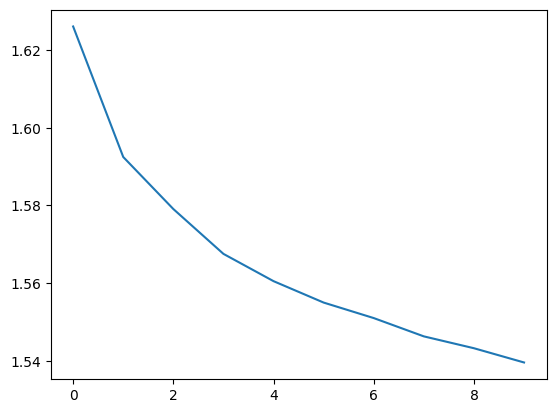

## 21. GPU 를 사용하여 모델을 학습시켜 보세요. GPU 의 메모리가 허용하는 한도까지 batch_size 를 늘려서 다시 실행해 보세요.

device: cuda


Epoch 1/10, Loss: 1.5366
Epoch 2/10, Loss: 1.5336
Epoch 3/10, Loss: 1.5307
Epoch 4/10, Loss: 1.5286
Epoch 5/10, Loss: 1.5258
Epoch 6/10, Loss: 1.5233
Epoch 7/10, Loss: 1.5218
Epoch 8/10, Loss: 1.5197
Epoch 9/10, Loss: 1.5178
Epoch 10/10, Loss: 1.5158
